<a href="https://colab.research.google.com/github/carlosrivero24-sys/Inteligencia_Artificial/blob/main/MultiCapa/Prediccion_de_la_eficencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo
#Instalamos el conjunto de datos que vamos a utilizar

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets
#Importamos fetch_ucirepo que va a ser el data set que vamos a utilizar y le damos valores a X y a Y

In [ ]:
X.head()
#Observamos las 5 primeras filas de la tabla de X

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [ ]:
y.head()
#Observamos las 5 primeras filas de la tabla de Y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [ ]:
X.info()
#La informacion de X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [ ]:
y.info()
#La informacion de Y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [ ]:
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()
#Importamos pandas para poder manipular los datos del data frame

In [ ]:
df.shape
#Observamos el valor de filas y columnas

(392, 8)

In [ ]:
df.describe()
#Nos da valores importantes como media desviacion etc

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,194.411990,5.471939,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,104.644004,1.705783,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,105.000000,4.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,151.000000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,275.750000,8.000000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [ ]:
df.info()
#La informacion del dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [ ]:
X = df.drop('mpg', axis=1)
y = df['mpg']
#Definimos nuevamente los valores de X y Y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)
#Train 80% test 20%

In [ ]:
print(X_train.shape)
print(X_test.shape)


(313, 7)
(79, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Escalamos los datos de 0 a 1

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
#Importamos nuestro modelo de red neuronal que es Sequential y nuestras capas, le pedimos que tenga tres capas ocultas y una de salida


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
##Se compila el modelo utilizando  Adam
# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [ ]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],
)
#Se compila el modelo optimizador Adam y la función de pérdida error cuadrático medio

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)
#Entrenamos a nuestro modelo con 5 epocas

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 395.3230 - root_mean_squared_error: 19.5232 - val_loss: 21.4287 - val_root_mean_squared_error: 4.6291
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.9775 - root_mean_squared_error: 3.7272 - val_loss: 14.8827 - val_root_mean_squared_error: 3.8578
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.5727 - root_mean_squared_error: 3.3980 - val_loss: 10.9260 - val_root_mean_squared_error: 3.3054
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.3584 - root_mean_squared_error: 3.0543 - val_loss: 12.6925 - val_root_mean_squared_error: 3.5627
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.1006 - root_mean_squared_error: 3.0040 - val_loss: 10.9285 - val_root_mean_squared_error: 3.3058


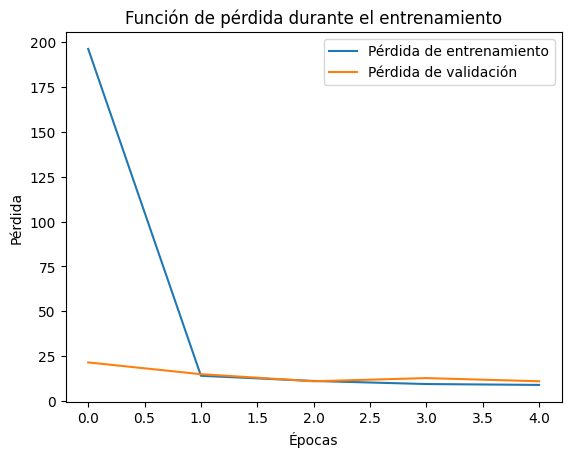

In [ ]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()
# Importamos matplotlib.pyplot para poder graficar nuestra funcion de perdida donde tenemos nuestra perdida de entrenamiento y perdida de validacion

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')
#Evaluamos el modelo en el conjunto de prueba

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.3609 - root_mean_squared_error: 3.2116
Test Mean Absolute Error: 3.31


In [ ]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())
#Hacemos las preicciones y comparamos con los valores reales

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
     Actual  Predicted
82     23.0  23.979774
167    29.0  29.938124
356    32.4  36.449108
120    19.0  18.028662
385    38.0  40.812527
